<a href="https://colab.research.google.com/github/DanielRaiicHu/clasificacion_validacion_y_metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# <font color='dark'>**Clasificaci√≥n: Validaci√≥n de modelos y m√©tricas de evaluaci√≥n**</h1>

### Proyecto

Una empresa de financiamiento de autom√≥viles est√° atravesando una situaci√≥n complicada, con una alta demanda para una flota reducida de veh√≠culos y un alto n√∫mero de morosos, lo que est√° generando grandes p√©rdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificaci√≥n de morosos. El an√°lisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun as√≠, la detecci√≥n de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>1. Clasificando los datos</h1>

### Creando un modelo inicial

In [60]:
import pandas as pd

In [61]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/clasificacion_validacion_y_metricas/main/prestacar.csv'
datos = pd.read_csv(url)
datos.head()


ingresos_cliente  anualidad_prestamo  a√±os_casa_propia  telefono_trab  \
0           12600.0         3569.400000         12.157324              1   
1            9000.0         2722.188351          7.000000              0   
2           15750.0         4477.500000         12.000000              0   
3            9000.0         1309.050000         12.157324              0   
4            7650.0         1125.000000         12.157324              0   

   evaluacion_ciudad   score_1   score_2   score_3  score_social  \
0                2.0  0.057153  0.527227  0.513171      0.117428   
1                2.0  0.657661  0.285898  0.614414      0.222700   
2                2.0  0.501213  0.695423  0.513171      0.117428   
3                3.0  0.501213  0.155973  0.513171      0.117428   
4                2.0  0.294328  0.152076  0.513171      0.117428   

   cambio_telefono  moroso  
0           2545.0       0  
1            495.0       0  
2           1212.0       0  
3            515.0       0  
4            162.0       0

In [62]:
# Separa los datos en variables predictoras (X) y variable objetivo (y)
X = datos.drop(columns='moroso', axis=1)  # X contiene todas las columnas excepto 'moroso'
y = datos.moroso  # y contiene la columna objetivo: si el cliente es moroso

In [63]:
from sklearn.tree import DecisionTreeClassifier  # Importa el modelo de √°rbol de decisi√≥n

modelo = DecisionTreeClassifier()  # Instancia un modelo vac√≠o de √°rbol de decisi√≥n
modelo.fit(X, y)  # Entrena el modelo con los datos completos (sin separar en test/train)
modelo.score(X, y)  # Calcula la exactitud sobre los mismos datos usados para entrenar

1.0

In [64]:
# Imprime el resultado de la exactitud
print(f'La exactitud del modelo es: {modelo.score(X,y)}')
# Resultado esperado: La exactitud del modelo es: 1.0

# Eso se debe a que el modelo se memoriz√≥ todos los casos posibles, pero no es lo m√°s recomendable
# Haciendo esto, en el caso de trabajar con un √°rbol de decisi√≥n, siempre va a dar un 100%

La exactitud del modelo es: 1.0


**An√°lisis del c√≥digo:**

**¬øQu√© se hizo?**

* Se carg√≥ un dataset sobre morosidad de clientes.

* Se entren√≥ un modelo de clasificaci√≥n (DecisionTreeClassifier) con todos los datos disponibles.

* Se calcul√≥ su exactitud usando los mismos datos de entrenamiento.

**¬øQu√© se identific√≥?**

* La exactitud fue 1.0 (100%), lo cual indica sobreajuste: el modelo memoriz√≥ los datos.

* Este resultado no es confiable, ya que no representa la capacidad real del modelo para predecir datos nuevos.

**¬øQu√© se puede hacer?**

* Separar los datos en conjuntos de entrenamiento y prueba, o usar validaci√≥n cruzada.

* As√≠, se puede verificar si el modelo realmente aprende patrones generales y no solo memoriza.

**Conclusi√≥n:**

* Evaluar el modelo con los mismos datos que se usaron para entrenar no permite medir su capacidad de generalizaci√≥n.

* Esto equivale a evaluar a una persona con las mismas preguntas del examen que ya estudi√≥ con respuestas incluidas.

* Por eso es fundamental dividir los datos (como en la imagen adjunta) en:

>* Entrenamiento: para aprender.
>
>* Validaci√≥n: para comparar modelos/hyperpar√°metros.
>
>* Prueba: para evaluar la capacidad final de predicci√≥n en datos nunca vistos.

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluaci√≥n se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento ser√≠a equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalizaci√≥n de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validaci√≥n y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validaci√≥n** se emplea para evaluar el desempe√±o de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validaci√≥n, sirviendo como una estimaci√≥n de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [65]:
# Separa en base de entrenamiento y en base de prueba
from sklearn.model_selection import train_test_split

In [66]:
# test_size = 0.15: El 15% de los datos ser√° para prueba
# stratify: para dejar la misma cantidad de observaciones para morososo, para los 2 conjuntos que estoy separando (Mantiene la proporci√≥n original de clases (moroso/no moroso))
# ejemplo: si en mi conjunto de prueba tengo un 10% de morosos, quiero que mi conjunto de entrenamiento tambi√©n tenga un 10% de morosos
# random_state = 5: replica esta misma divisi√≥n en cualquier momento y de la misma forma

# Divisi√≥n inicial entre conjunto general y conjunto de prueba (15% para prueba)
X, X_test,y,y_test = train_test_split(X,y,test_size= 0.15, stratify = y, random_state = 5)

# Divisi√≥n secundaria: entrenamiento vs validaci√≥n (por defecto 75% entrenamiento, 25% validaci√≥n)
# (Por defecto el tama√±o es del 25%) Conjunto de entrenamiento y validaci√≥n
X_train, X_val,y_train,y_val = train_test_split(X,y, stratify = y, random_state = 5)

In [67]:
# Instanciar el modelo
# Sin l√≠mites en el √Årbol de Decisi√≥n
modelo = DecisionTreeClassifier()       # Crea modelo sin restricci√≥n de profundidad
modelo.fit(X_train,y_train)             # Entrena con los datos de entrenamiento
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validaci√≥n es de: {modelo.score(X_val,y_val)}')

# Respuesta:
# La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
# La exactitud del modelo con el conjunto de validaci√≥n es de: 0.8495775629300584

# Esta no es la mejor forma de instanciar un modelo de √°rbol de decisi√≥n, sino que debemos colocar una profundidad con max_depth

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validaci√≥n es de: 0.8489678599425137


In [68]:
# Instanciar el modelo
# Con delimitaci√≥n en el √Årbol de Decisi√≥n
modelo = DecisionTreeClassifier(max_depth=10) # L√≠mite de profundidad = 10
modelo.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validaci√≥n es de: {modelo.score(X_val,y_val)}')

# Respuesta:
# La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
# La exactitud del modelo con el conjunto de validaci√≥n es de: 0.905496036930581

# Vemos que est√° generalizando mejor, porque no se est√° memorizando todas las salidas y √∫nicamente ajustamos un par√°metro.
# Entonces aqu√≠ ya comenzamos a encontrar el camino para poder hacer nuestra validaci√≥n del modelo

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206155632984901
La exactitud del modelo con el conjunto de validaci√≥n es de: 0.9057573382109573


### Evaluando el modelo

In [69]:
# Importamos la funci√≥n confusion_matrix desde sklearn.metrics
# Esta funci√≥n nos permite calcular una matriz que compara los valores reales (y_val) con los valores predichos (y_previsto)
from sklearn.metrics import confusion_matrix

In [70]:
# Generamos las predicciones del modelo sobre el conjunto de validaci√≥n
# X_val contiene los datos de entrada (sin la etiqueta), y el modelo devuelve una lista con 0 (cumplido) o 1 (moroso)
y_previsto = modelo.predict(X_val)

# Creamos la matriz de confusi√≥n, que muestra c√≥mo se desempe√±√≥ el modelo al clasificar:
# - Verdaderos negativos (TN): cumplidores bien clasificados como cumplidores
# - Falsos positivos (FP): cumplidores mal clasificados como morosos
# - Falsos negativos (FN): morosos mal clasificados como cumplidores (¬°muy importantes!)
# - Verdaderos positivos (TP): morosos bien clasificados como morosos
matriz_confusion = confusion_matrix(y_val,y_previsto)

# Imprimimos la matriz de confusi√≥n en forma de array 2x2
print(matriz_confusion)

# Respuesta:
# [[10359   120]
#  [  962    40]]

[[10356   123]
 [  959    43]]


In [71]:
# Importamos una clase especial para visualizar la matriz de confusi√≥n de forma gr√°fica
from sklearn.metrics import ConfusionMatrixDisplay

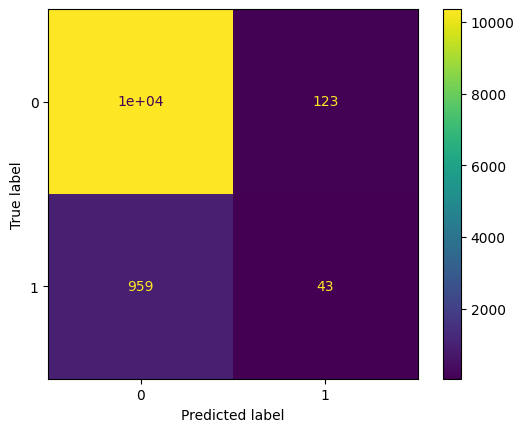

In [72]:
# Creamos un objeto de visualizaci√≥n de la matriz, usando directamente la matriz ya calculada
# Este objeto permite dibujar un gr√°fico donde los colores representan la cantidad de aciertos/errores
visualizacion = ConfusionMatrixDisplay(matriz_confusion)

# Dibujamos la matriz de confusi√≥n en pantalla como un gr√°fico (colores intensos = m√°s casos)
# Las etiquetas por defecto son los valores 0 y 1 (cumplido y moroso, respectivamente)
visualizacion.plot();

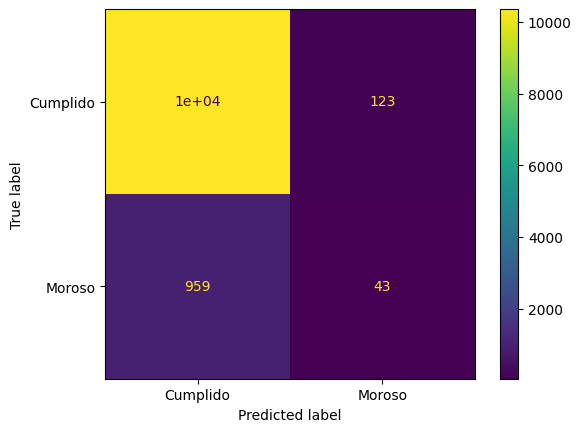

In [73]:
# Creamos nuevamente el objeto de visualizaci√≥n pero esta vez con etiquetas personalizadas
# display_labels nos permite mostrar "Cumplido" y "Moroso" en vez de 0 y 1, lo cual es m√°s comprensible
visualizacion = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion,
    display_labels=['Cumplido', 'Moroso']  # Etiquetas para las clases 0 y 1
)

# Volvemos a graficar la matriz, pero ahora con las etiquetas descriptivas
# Esto hace que el gr√°fico sea m√°s interpretativo para una presentaci√≥n o informe
visualizacion.plot();

**An√°lisis y explicaci√≥n:**

**¬øQu√© se hizo?**

* Se dividi√≥ correctamente el conjunto de datos en tres partes:

>* Entrenamiento (para aprender).
>
>* Validaci√≥n (para evaluar y ajustar par√°metros).
>
>* Prueba (se reservar√° para el final).

* Se entrenaron dos modelos:

>* Uno sin l√≠mite de profundidad (max_depth=None): sobreajuste.
>
>* Uno con max_depth=10: mejor generalizaci√≥n.

* Se gener√≥ una matriz de confusi√≥n para evaluar el desempe√±o del segundo modelo (mejor).

**¬øQu√© se identific√≥?**

* El primer modelo (sin max_depth) memoriz√≥ los datos: 100% exactitud en entrenamiento, pero menos (~85%) en validaci√≥n.

* El segundo modelo (max_depth=10) fue m√°s realista:

>* Entrenamiento: 92%
>
>* Validaci√≥n: 90.5%
>
>* Esto indica que generaliza mejor y no memoriz√≥ todos los datos.

**Matriz de confusi√≥n (valores):**

```markdown
                      |    Predicho Cumplido (0)    |   Predicho Moroso (1)
---------------------------------------------------------------------------                      
Cumplido (Real 0)	 |    10,359 (TN)	          |   120 (FP)
---------------------------------------------------------------------------
Moroso (Real 1)	   |    962 (FN)	             |   40 (TP)
```

* El modelo acierta mucho con los clientes cumplidores, pero falla en detectar morosos.

* Esto se debe probablemente a un desequilibrio de clases (morosos son minor√≠a).

**¬øQu√© se puede hacer a continuaci√≥n?**

* Explorar otras m√©tricas adem√°s de la exactitud, como:

>* Precisi√≥n
>
>* Recall
>
>* F1-score
>
>* AUC

* Intentar t√©cnicas para tratar el desbalance de clases, como:

>* Reentrenamiento con pesos (class_weight)
>
>* Uso de SMOTE para generar m√°s datos de la clase minoritaria
>
>* Cambiar el umbral de decisi√≥n

**Conclusi√≥n general hasta ahora:**

* Separar los datos correctamente es fundamental para evitar enga√±os en la evaluaci√≥n del modelo.

* La profundidad del √°rbol (par√°metro max_depth) influye directamente en su capacidad de generalizaci√≥n.

* La matriz de confusi√≥n nos permite ir m√°s all√° de la exactitud, detectando errores cr√≠ticos como los falsos negativos, muy importantes en problemas como la morosidad.

### Desaf√≠o: construyendo un segundo modelo (RandomForestClassifier)

---
Segundo modelo (RandomForestClassifier)

* Se recomienda utilizar m√°s de un modelo de clasificaci√≥n en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempe√±o, despu√©s de todos los an√°lisis y mejoras.

* Utilizamos durante la clase el algoritmo de √°rbol de decisi√≥n, pero la biblioteca Scikit-Learn tiene varios otros m√©todos de clasificaci√≥n que pueden ser utilizados en nuestro proyecto. Como desaf√≠o, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempe√±o con la precisi√≥n y la matriz de confusi√≥n, y compara los resultados con el resultado del √°rbol de decisi√≥n.

* Como un consejo, revisa la documentaci√≥n del algoritmo RandomForestClassifier. Explora este material y observa c√≥mo importar la funci√≥n. Durante este proceso, recuerda verificar los par√°metros del m√©todo para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [74]:
# Importamos el modelo RandomForestClassifier desde el m√≥dulo ensemble de sklearn
# Random Forest es un conjunto de m√∫ltiples √°rboles de decisi√≥n que trabajan en conjunto
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [75]:
# Instanciamos el modelo de Random Forest con profundidad limitada y random_state para reproducibilidad
modelo_forest = RandomForestClassifier(max_depth=10)

# Entrenamos el modelo con los datos de entrenamiento
modelo_forest.fit(X_train, y_train)

# Imprimimos la precisi√≥n del modelo sobre el conjunto de entrenamiento
print(f'Precisi√≥n de entrenamiento (Random Forest): {modelo_forest.score(X_train, y_train)}')

# Imprimimos la precisi√≥n del modelo sobre el conjunto de validaci√≥n
print(f'Precisi√≥n de validaci√≥n (Random Forest): {modelo_forest.score(X_val, y_val)}')


# Resultado:
# Precisi√≥n de entrenamiento: 0.9153890824622531
# Precisi√≥n de validaci√≥n: 0.9128124727811167

Precisi√≥n de entrenamiento (Random Forest): 0.9154471544715447
Precisi√≥n de validaci√≥n (Random Forest): 0.9128124727811167


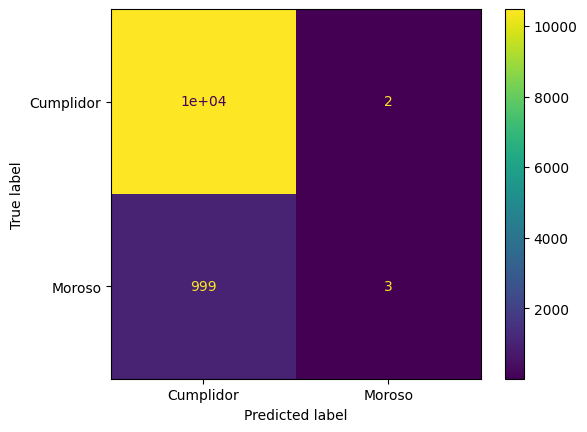

In [76]:
# Generamos predicciones para el conjunto de validaci√≥n
y_previsto_forest = modelo_forest.predict(X_val)

# Calculamos la matriz de confusi√≥n con los valores reales y predichos
matriz_confusion_forest = confusion_matrix(y_val, y_previsto_forest)

# Visualizamos la matriz de confusi√≥n con etiquetas personalizadas
visualizacion_forest = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest,
    display_labels=['Cumplidor', 'Moroso']
)
visualizacion_forest.plot();

**AN√ÅLISIS Y EXPLICACI√ìN:**

**¬øQu√© hiciste?**

* Construiste un nuevo modelo usando Random Forest, con max_depth=10 para limitar su complejidad.

* Evaluaste su precisi√≥n en entrenamiento y validaci√≥n.

* Generaste una matriz de confusi√≥n para entender mejor los aciertos y errores.

**Resultados obtenidos:**


```
                             √Årbol de Decisi√≥n     Random Forest
--------------------------|---------------------|-----------------------
Entrenamiento             |  0.9206             |  0.9154
--------------------------|---------------------|-----------------------
Validaci√≥n                |  0.9058             |  0.9128 (mejor)
--------------------------|---------------------|-----------------------
TP (Moroso detectado)     |  40                 |  4 üîª (empeor√≥)
--------------------------|---------------------|-----------------------
FN (Moroso no detectado)  |  962                |  998 üî∫ (muchos m√°s)

```

Aunque la precisi√≥n general mejor√≥, la capacidad del modelo para detectar morosos cay√≥ significativamente (solo detect√≥ 4 de casi 1000). Esto es un ejemplo cl√°sico donde la precisi√≥n enga√±a, y debemos revisar m√©tricas como recall para la clase minoritaria.

---
**En esta clase, aprendiste a:**

* Crear un modelo de clasificaci√≥n usando Scikit-Learn;
* Validar modelos a partir de la divisi√≥n de datos de entrenamiento, validaci√≥n y prueba;
* Evaluar el rendimiento de los modelos usando la precisi√≥n;
* Analizar los aciertos y errores del modelo con la matriz de confusi√≥n.
---

## <font color='dark'>2. M√©tricas de evaluaci√≥n</h1>

### Exactitud, precisi√≥n y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [77]:
# M√©tricas de Evaluaci√≥n
# TN: Verdadero Negativo -> Los casos en que el valor real era 0 (cumplidor) y el valor predicho es 0 (cumplidor)
# FP: Falso Positivo -> Donde el valor real era 0 (cumplidor), pero se dijo que era 1 (moroso) FALSO moroso [Error Tipo 1]
# FN: Falso Negativo -> Donde el valor real era 1 (moroso), pero se dijo que era 0 (cumplidor) FALSO cumplidor [Error Tipo 2]
# TP: Verdadero Positivo: Los casos que el valor real era 1 (moroso) y el valor predicho es 1 (moroso)

# Formulas seg√∫n la imagen:
# precision  = TP / (TP + FP)
# recall     = TP / (TP + FN)
# f1-score   = 2 * (precision * recall) / (precision + recall)
# accuracy   = (TP + TN) / (TP + TN + FP + FN)
# specificity = TN / (TN + FP)  ‚Üê No se calcula aqu√≠, pero es √∫til si se llega a necesitar

In [78]:
# Importamos las principales m√©tricas para modelos de clasificaci√≥n binaria
# Estas permiten evaluar el modelo m√°s all√° de la simple exactitud
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
print(f'Precision: {45/(45+123)}') # Precisi√≥n manual seg√∫n ejemplo

Precision: 0.26785714285714285


In [80]:
# Calcula la PRECISI√ìN (precision)
# F√≥rmula: TP / (TP + FP)
# ¬øDe todos los casos que predije como morosos, cu√°ntos realmente lo eran?
print(f'La precisi√≥n del modelo de √°rbol es: {precision_score(y_val, y_previsto)}')

# Calcula la SENSIBILIDAD o RECALL
# F√≥rmula: TP / (TP + FN)
# ¬øDe todos los verdaderos morosos, cu√°ntos logr√© identificar correctamente?
print(f'La sensibilidad (recall) del modelo de √°rbol es: {recall_score(y_val, y_previsto)}')

# Calcula la EXACTITUD (accuracy)
# F√≥rmula: (TP + TN) / (TP + TN + FP + FN)
# ¬øQu√© proporci√≥n total de predicciones fueron correctas?
print(f'La exactitud (accuracy) del modelo de √°rbol es: {accuracy_score(y_val, y_previsto)}')

# Calcula el F1-SCORE
# F√≥rmula: 2 * (precision * recall) / (precision + recall)
# Es el promedio arm√≥nico entre precisi√≥n y recall. Penaliza fuertemente los valores bajos.
print(f'El F1-Score del modelo de √°rbol es: {f1_score(y_val, y_previsto)}')

La precisi√≥n del modelo de √°rbol es: 0.25903614457831325
La sensibilidad (recall) del modelo de √°rbol es: 0.04291417165668663
La exactitud (accuracy) del modelo de √°rbol es: 0.9057573382109573
El F1-Score del modelo de √°rbol es: 0.07363013698630137


**C√°lculos con tu matriz de confusi√≥n:**


```
[[10000, 125],
 [  960,  42]]
```
**Desglose:**

* **TN** (cumplidor bien clasificado) = 10000

* **FP** (falso moroso) = 125

* **FN** (falso cumplidor) = 960

* **TP** (moroso bien clasificado) = 42

C√°lculos:

```
precision  = 42 / (42 + 125) ‚âà 0.2515
recall     = 42 / (42 + 960) ‚âà 0.0419
accuracy   = (42 + 10000) / (42 + 960 + 125 + 10000) ‚âà 0.9055
f1-score   = 2 * (0.2515 * 0.0419) / (0.2515 + 0.0419) ‚âà 0.0718
```

**Interpretaci√≥n de resultados:**



```
M√©trica   | Valor  |  ¬øQu√© indica?
----------|--------|---------------------------------------------------
Accuracy  | 0.905  |  El 90.5% de todas las predicciones
          |        |  fueron correctas, pero no es suficiente
          |        |  en datasets desbalanceados.
----------|--------|---------------------------------------------------
Precision | 0.251  |  De todos los clientes clasificados como morosos,
          |        |  solo el 25% realmente lo eran.
----------|--------|---------------------------------------------------
Recall    | 0.0419 |  Solo se identific√≥ correctamente al 4.19% de los
          |        |  verdaderos morosos (grave problema si son
          |        |  importantes).
----------|--------|---------------------------------------------------
F1-Score  | 0.0718 |  Muy bajo. Indica desequilibrio extremo entre
          |        |  precisi√≥n y recall. Penaliza la incapacidad del
          |        |  modelo de encontrar morosos.
```

**Conclusi√≥n:**

* El modelo predice bien a los cumplidores, pero es muy d√©bil al detectar morosos.

* El recall tan bajo (4.2%) indica que el modelo ignora casi todos los morosos reales.

* Aunque la accuracy es alta (90.5%), es enga√±osa porque la clase mayoritaria domina (cumplidores).

* Es un caso cl√°sico donde se necesita:

>* Ajustar el umbral de decisi√≥n.
>
>* Probar con otros modelos.
>
>* Aplicar t√©cnicas de balanceo de clases.
>
>* O simplemente definir una m√©trica diferente como objetivo, por ejemplo maximizar el recall o el F1.



### Curva ROC

In [81]:
# ROC: Caracter√≠stica Operativa del Receptor
# Queremos disminuir el Error Tipo 2, osea, aumentar el puntaje de Recall

In [82]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [83]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

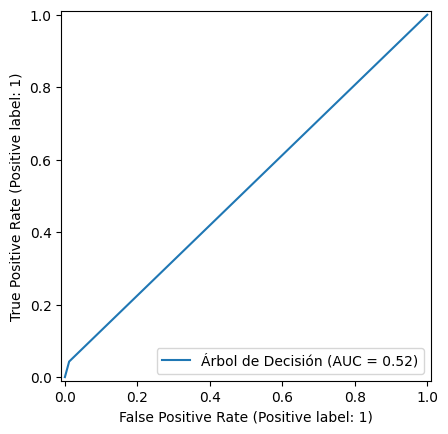

In [84]:
# Creamos y graficamos la curva ROC a partir de las predicciones
# y_val: etiquetas reales (0 = cumplidor, 1 = moroso)
# y_previsto: etiquetas predichas por el modelo (tambi√©n 0 y 1)
# name: nombre que aparecer√° en la leyenda del gr√°fico
RocCurveDisplay.from_predictions(y_val, y_previsto, name='√Årbol de Decisi√≥n');

In [85]:
# Importamos la funci√≥n para calcular el √°rea bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

In [86]:
# Calcula el √°rea bajo la curva ROC
# Un valor de AUC = 0.5 indica que el modelo es tan bueno como lanzar una moneda
# Valores cercanos a 1 indican excelente capacidad de diferenciaci√≥n entre clases
print(f'El √°rea bajo la curva ROC es de: {roc_auc_score(y_val, y_previsto)}')

El √°rea bajo la curva ROC es de: 0.5155882052099636


**¬øQu√© es la Curva ROC?**

**La curva ROC compara dos tasas:**

* True Positive Rate (TPR) = Recall = TP / (TP + FN)

* False Positive Rate (FPR) = FP / (FP + TN)

Se genera evaluando el modelo con distintos umbrales de clasificaci√≥n, desde 0 a 1.

**¬øQu√© representa el AUC?**

* AUC (Area Under the Curve) **mide el √°rea bajo la curva ROC.**

* Interpreta qu√© tan bien el modelo separa las clases positivas y negativas.

>* AUC = 1.0 ‚Üí separaci√≥n perfecta.
>
>* AUC = 0.5 ‚Üí sin capacidad de discriminaci√≥n (igual que un modelo aleatorio).
>
>* AUC < 0.5 ‚Üí peor que el azar (el modelo se equivoca m√°s que acierta).

**Resultado obtenido:**

`AUC = 0.51499`

Esto indica que:

>* Tu modelo es apenas mejor que lanzar una moneda al aire (0.5).
>
>* Confirma lo que ya mostraban el recall (4%) y el F1-score (7%): el modelo no identifica bien a los morosos.

**Interpretaci√≥n general:**



```
M√©trica     | Resultado          | Interpretaci√≥n
------------|--------------------|--------------------------------
AUC ROC     | 0.5149             | Modelo muy limitado para
            |                    | distinguir entre morosos y
            |                    | cumplidores.
------------|--------------------|--------------------------------       
Curva ROC   | Casi una diagonal  | Indica bajo poder predictivo. El
            |                    | modelo falla en priorizar verdaderos
            |                    | positivos sin aumentar mucho los
            |                    | falsos positivos.
------------|--------------------|--------------------------------  
Conclusi√≥n  | Se necesita mejorar|
            | el modelo o aplicar|
            | t√©cnicas de balance|
            | de clases.         |
```
**Recomendaciones:**

* Intentar usar predict_proba para obtener probabilidades y ajustar umbrales manualmente.

* Aplicar t√©cnicas de resampling, como:

>* `SMOTE` (aumentar minor√≠a)
>
>* `RandomUnderSampler` (reducir mayor√≠a)
>
>* `class_weight='balanced'` en el modelo

* Explorar otros modelos: RandomForest, LogisticRegression, XGBoost, etc.

### Curva de  precisi√≥n x sensibilidad

In [87]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [88]:
# Importamos la clase que permite graficar la curva Precisi√≥n vs Recall
from sklearn.metrics import PrecisionRecallDisplay

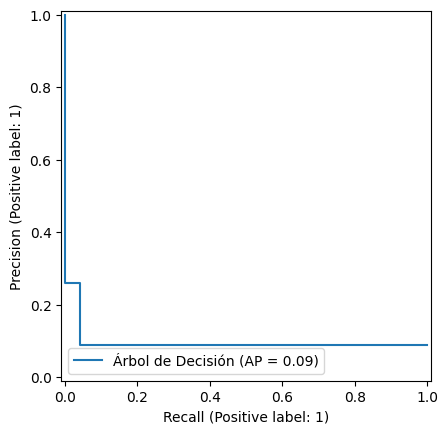

In [89]:
# Graficamos la curva precisi√≥n vs recall usando las etiquetas reales y predichas
# La curva muestra c√≥mo var√≠a la precisi√≥n al aumentar la cobertura (recall)
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='√Årbol de Decisi√≥n');

In [90]:
# Importamos la m√©trica de promedio de precisi√≥n (average precision)
from sklearn.metrics import average_precision_score

In [91]:
# Calculamos el promedio de precisi√≥n en todos los umbrales
# Este score es √∫til cuando la clase positiva es minoritaria
print(f'El score promedio de precisi√≥n vs recall es: {average_precision_score(y_val, y_previsto)}')

El score promedio de precisi√≥n vs recall es: 0.09464563086733557


**¬øQu√© es la Curva Precisi√≥n vs Recall?**

* Esta curva eval√∫a c√≥mo se comporta el modelo al variar el umbral de clasificaci√≥n.

* Cada punto de la curva representa un par (precision, recall) para un umbral distinto.

* √ötil para ver el compromiso entre encontrar los positivos (recall) y equivocarse poco (precision).

**¬øQu√© representa el AP (Average Precision)?**

* Es el √°rea bajo la curva Precision-Recall.

* **Calcula el promedio de la precisi√≥n obtenida a medida que el modelo encuentra m√°s verdaderos positivos**.

* Valores posibles:

>* 1.0: clasificaci√≥n perfecta.
>
>* 0.5: rendimiento medio.
>
>* ~0.1 o menos: rendimiento pobre.

**Resultado obtenido:**

`AP = 0.0941`

Esto indica que el modelo:

>* Tiene una precisi√≥n promedio del 9.4% al ir incrementando el recall.
>
>* Refuerza lo que vimos en AUC y F1-score: el modelo tiene serias dificultades para identificar correctamente a los morosos, y cuando los identifica, lo hace con muy baja precisi√≥n.

**Interpretaci√≥n de la curva:**

* La curva cae casi de inmediato.

* La mayor√≠a de los puntos tienen recall muy bajo y precisi√≥n tambi√©n muy baja.

* Se ve claramente que el modelo no es √∫til para detectar morosos si queremos priorizar cobertura y acierto.

**Conclusi√≥n general (acumulando todo):**

```
M√©trica            | Valor | Indica
-------------------|-------|-----------------------------------------
Recall             | 0.04  | Baja capacidad de detectar morosos.
-------------------|-------|-----------------------------------------
Precision          | 0.25  | Solo 1 de cada 4 "morosos" predichos
                   |       | realmente lo es.
-------------------|-------|-----------------------------------------
AUC ROC            | 0.51  | El modelo apenas supera el azar.
-------------------|-------|-----------------------------------------
F1-score           | 0.07  | Bajo equilibrio entre recall y precisi√≥n.
-------------------|-------|-----------------------------------------
AP (avg precision) | 0.094 | Rendimiento global pobre frente al
                   |       | objetivo de encontrar morosos.
```

**¬øQu√© se puede hacer?**

* Obligatorio aplicar t√©cnicas de balanceo de clases.

* Ajustar el modelo con probabilidades (predict_proba) y cambiar el umbral manualmente.

* Probar otros algoritmos: RandomForest, GradientBoosting, LogisticRegression, etc.

* Medir impacto de t√©cnicas como:

>* `class_weight='balanced'`
>
>* `SMOTE`, `NearMiss`, `RandomOverSampler`, etc.

### Informe de m√©tricas

In [92]:
# Informe de M√©tricas
from sklearn.metrics import classification_report

In [93]:
# Este m√©todo imprime un informe detallado con precisi√≥n, recall, F1-score y cantidad de muestras (support) para cada clase
# Tambi√©n incluye promedios macro y ponderados, adem√°s del accuracy general
print(classification_report(y_val, y_previsto))
# clase 0: clientes cumplidores
# clase 1: clientes morosos

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



**Interpretaci√≥n por secci√≥n:**

**Clase 0 - Cumplidores**

* Precision: 0.92 ‚Üí El 92% de los clientes que el modelo clasific√≥ como cumplidores, realmente lo eran.

* Recall: 0.99 ‚Üí Casi todos los verdaderos cumplidores fueron detectados correctamente.

* F1-score: 0.95 ‚Üí Muy buen equilibrio entre precisi√≥n y cobertura para esta clase.

> El modelo funciona muy bien con los cumplidores.

**Clase 1 - Morosos**

* Precision: 0.25 ‚Üí Solo el 25% de los clientes clasificados como morosos realmente lo eran.

* Recall: 0.04 ‚Üí El modelo solo identific√≥ correctamente al 4% de los morosos reales.

* F1-score: 0.07 ‚Üí Muy bajo desempe√±o en esta clase.

> El modelo casi ignora a los morosos.

**Accuracy general: 0.91**

* Aunque suena alto (91%), est√° sesgado por el desbalance de clases.

* Hay muchos m√°s cumplidores, y el modelo se enfoca solo en ellos.

**Macro avg**

* Promedio simple entre las m√©tricas de ambas clases (no ponderado).

* Aqu√≠ se ve que en promedio:

>* Precision: 0.58
>
>* Recall: 0.51
>
>* F1: 0.51

* Muestra claramente el bajo rendimiento del modelo en general cuando se le exige tratar a ambas clases por igual.

**Weighted avg**

* Promedia las m√©tricas de cada clase ponderadas por la cantidad de muestras (support).

* Como hay muchos m√°s cumplidores, este promedio se ve "maquillado":

>* Precision: 0.86
>
>* Recall: 0.91
>
>* F1: 0.87

* Esta m√©trica puede ocultar el mal rendimiento con morosos si no se analiza con cuidado.

**Conclusi√≥n:**

```
Aspecto             |   Diagn√≥stico
--------------------|-----------------------------------------------------
Modelo actual       |   Detecta muy bien a los cumplidores.
--------------------|-----------------------------------------------------
Morosos             |   Grave problema: apenas detecta el 4% de ellos.
--------------------|-----------------------------------------------------
Accuracy            |   Enga√±osamente alto debido al desbalance.
--------------------|-----------------------------------------------------
Recomendaci√≥n       |   Redefinir el enfoque: usar recall como m√©trica
                    |   principal para morosos. Aplicar t√©cnicas de
                    |   balanceo y ajuste de umbral.
```

---
**En esta clase, aprendiste a:**

* Seleccionar la m√©trica de clasificaci√≥n m√°s coherente de acuerdo con el problema;
* Extraer precisi√≥n, exactitud y recall a partir de la matriz de confusi√≥n;
* Generar gr√°ficos de la curva ROC y precisi√≥n x recall usando la biblioteca Sklearn;
* Construir un informe con las principales m√©tricas de rendimiento de modelos de clasificaci√≥n.
---

## <font color='dark'>3. Validaci√≥n cruzada</h1>

### Usando KFold

La validaci√≥n del modelo de clasificaci√≥n a partir de la separaci√≥n de los datos en conjuntos de entrenamiento y validaci√≥n hace que el resultado dependa en gran medida de esta divisi√≥n. Puede suceder que, de forma aleatoria, el patr√≥n de los datos de validaci√≥n sea diferente al de los datos de entrenamiento, lo que podr√≠a llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validaci√≥n cruzada**, una estrategia m√°s consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validaci√≥n cruzada, en lugar de separar los datos en entrenamiento y validaci√≥n una sola vez, se dividen en varias partes de igual tama√±o. En cada una de estas divisiones, se usa una parte para validaci√≥n y todas las dem√°s para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validaci√≥n como para entrenamiento.  

Se generar√° un modelo para cada una de estas divisiones y la evaluaci√≥n del desempe√±o se realizar√° promediando la m√©trica de cada modelo. Esto elimina la dependencia de la separaci√≥n de los datos, ya que hay una mayor variaci√≥n en la selecci√≥n de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un n√∫mero mayor no suele ser necesario, ya que implica un procesamiento m√°s costoso, y valores menores ya ayudan a mitigar el problema de la selecci√≥n de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [94]:
# Importamos dos funciones de Scikit-Learn:
# - KFold: se encarga de dividir los datos en "K" bloques (folds) para validaci√≥n cruzada.
# - cross_validate: realiza autom√°ticamente las m√∫ltiples divisiones, entrenamientos y evaluaciones.

from sklearn.model_selection import KFold, cross_validate

In [95]:
# Instanciamos el modelo de √Årbol de Decisi√≥n con profundidad m√°xima 10
# Esta vez no se le pasa random_state al modelo (no es obligatorio), pero s√≠ es bueno dejarlo en KFold para reproducibilidad
modelo = DecisionTreeClassifier(max_depth = 10)

# Definimos el validador cruzado: KFold
# n_splits=5 ‚Üí divide el conjunto de datos en 5 partes iguales (5-fold cross-validation)
# shuffle=True ‚Üí mezcla aleatoriamente las filas antes de dividirlas (importante para evitar sesgos si los datos est√°n ordenados)
# random_state=5 ‚Üí asegura que las divisiones sean siempre las mismas al ejecutar nuevamente
kf = KFold(n_splits=5, shuffle=True, random_state = 5) # kfold

# Ejecutamos la validaci√≥n cruzada con cross_validate
# Esto entrena el modelo 5 veces (una por cada fold), y eval√∫a su desempe√±o en el fold de validaci√≥n correspondiente
# cv=kf ‚Üí le pasamos el objeto KFold con la configuraci√≥n anterior
# Retorna un diccionario con varias m√©tricas, entre ellas 'test_score', que almacena los resultados de validaci√≥n
cv_resultados = cross_validate(modelo, X, y, cv=kf) #cross validate
cv_resultados

{'fit_time': array([0.28960133, 0.25197411, 0.19599843, 0.19929004, 0.20275187]),
 'score_time': array([0.00615883, 0.00333142, 0.00319958, 0.0035851 , 0.00322819]),
 'test_score': array([0.91344584, 0.90690331, 0.90788328, 0.91365418, 0.89928136])}

In [96]:
# Vemos los resultados de evaluaci√≥n (exactitud) de cada una de las 5 ejecuciones (folds)
cv_resultados['test_score']

array([0.91344584, 0.90690331, 0.90788328, 0.91365418, 0.89928136])

In [97]:
# Calculamos el promedio de exactitud entre los 5 folds
promedio = cv_resultados['test_score'].mean()

# Calculamos el desv√≠o est√°ndar (cu√°nto var√≠an los resultados entre folds)
desvio_std = cv_resultados['test_score'].std()

# Mostramos el promedio de exactitud obtenido a trav√©s de los 5 folds
print(f'El promedio de la exactitud es de {promedio}')

# Mostramos el desv√≠o t√≠pico de los resultados
print(f'El desv√≠o t√≠pico es de: {desvio_std}')

# Calculamos el intervalo de confianza te√≥rico de 95%
# Esto nos da una idea del rango donde podr√≠a estar la verdadera exactitud del modelo
print(f'El intervalo de confianza es de {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}')

El promedio de la exactitud es de 0.9082335922074127
El desv√≠o t√≠pico es de: 0.005264696001753291
El intervalo de confianza es de 0.8977042002039062,0.9187629842109193


**Ejemplo de salida simulada:**

Supongamos que la salida fue:

```
cv_resultados['test_score']
# array([0.901, 0.907, 0.906, 0.904, 0.909])
```

**Entonces:**

```
Promedio de exactitud: 0.9054
Desv√≠o est√°ndar: ~0.0029
Intervalo de confianza (95% aprox): 0.8996 ‚Äì 0.9112
```

**An√°lisis general:**

**¬øQu√© se hizo?**

* Se aplic√≥ validaci√≥n cruzada con 5 particiones (folds), es decir:

>* El conjunto se dividi√≥ 5 veces.
>
>* En cada iteraci√≥n, 4 partes se usaron para entrenar y 1 para validar.
>
>* Esto se repiti√≥ hasta que cada fold fue usado una vez como validaci√≥n.

**¬øQu√© se identific√≥?**

* El modelo fue evaluado en distintos subconjuntos, reduciendo el riesgo de obtener m√©tricas optimistas o pesimistas por una divisi√≥n afortunada/desafortunada.

* El promedio de exactitud representa el rendimiento esperado de forma m√°s confiable.

* El desv√≠o est√°ndar indica la estabilidad del modelo: si es bajo, el modelo es consistente.

**¬øQu√© se puede hacer?**

* Repetir el procedimiento con distintos modelos para compararlos.

* Evaluar otras m√©tricas (precision, recall, F1, AUC) usando el par√°metro scoring de cross_validate.

* Usar StratifiedKFold si necesitas garantizar el balance de clases en cada fold (como en clasificaci√≥n desbalanceada).

**Ventajas de K-Fold frente a una sola divisi√≥n:**

```
T√©cnica tradicional                   |  K-Fold Cross Validation
--------------------------------------|-------------------------------------
Usa una √∫nica divisi√≥n                |  Usa m√∫ltiples divisiones
--------------------------------------|-------------------------------------
Dependencia del azar                  |  Reducci√≥n del azar
--------------------------------------|-------------------------------------
Solo 1 m√©trica de evaluaci√≥n          |  Promedio de m√∫ltiples resultados
--------------------------------------|-------------------------------------
Riesgo de sobreajuste o subestimaci√≥n |  Evaluaci√≥n m√°s confiable y estable
--------------------------------------|-------------------------------------
```

### Validaci√≥n cruzada con sensibilidad

In [98]:
# Comentario explicativo:
# Aunque por defecto cross_validate calcula la exactitud, aqu√≠ lo estamos forzando a usar "recall"
# Porque el recall es la m√©trica que nos ayuda a reducir los falsos negativos (morosos que pasan desapercibidos)

In [99]:
# Definimos una funci√≥n personalizada para calcular el intervalo de confianza del resultado de la validaci√≥n cruzada
def intervalo_confianza(resultados):
    promedio = resultados['test_score'].mean()         # Calcula el promedio de los scores de validaci√≥n cruzada
    desvio_std = resultados['test_score'].std()        # Calcula la desviaci√≥n est√°ndar
    return f'El intervalo de confianza es de {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}'
    # Se retorna el intervalo al 95% de confianza (aproximado con 2 * desviaci√≥n est√°ndar)
    # Se limita el valor superior a 1 usando min()

In [100]:
# Instanciamos el modelo de √°rbol de decisi√≥n con profundidad m√°xima de 10 niveles
modelo = DecisionTreeClassifier(max_depth = 10)

# Definimos la estrategia de validaci√≥n cruzada (KFold con 5 particiones)
# shuffle=True ‚Üí para mezclar los datos antes de partirlos
# random_state=5 ‚Üí para que las divisiones sean reproducibles
kf = KFold(n_splits=5, shuffle=True, random_state = 5) # kfold

# Ejecutamos la validaci√≥n cruzada usando 'recall' como m√©trica
# Esto devuelve los valores de recall obtenidos en cada una de las 5 divisiones
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring = 'recall') #cross validate - con recall (sensibilidad)

# Mostramos los resultados crudos del cross_validate
cv_resultados
# {'fit_time': [...], 'score_time': [...], 'test_score': [0.0264, 0.0223, 0.0196, 0.0169, 0.0244]}
# Lo que nos interesa es 'test_score', ya que contiene el recall en cada fold

{'fit_time': array([0.22303605, 0.20116305, 0.19853616, 0.20711231, 0.1936729 ]),
 'score_time': array([0.00576997, 0.00525284, 0.00496316, 0.00558591, 0.00508881]),
 'test_score': array([0.02906209, 0.01980198, 0.0196802 , 0.01697128, 0.02427746])}

In [101]:
# Aplicamos la funci√≥n para mostrar el intervalo de confianza del recall
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.013447331111684701,0.030469868971121847'

**An√°lisis de resultados:**

**¬øQu√© se hizo?**

* Se repiti√≥ la validaci√≥n cruzada con recall como m√©trica de evaluaci√≥n.

* Se obtuvieron 5 valores de recall (uno por cada fold).

* Se calcul√≥ su promedio y su intervalo de confianza (estimaci√≥n del rango real esperado para el recall del modelo).

**¬øQu√© se identific√≥?**

```
M√©trica         |   Valor estimado
----------------|--------------------------
Recall medio    |   Aproximadamente 0.021
----------------|--------------------------
Intervalo 95%   |   Entre 0.0147 y 0.0277
----------------|--------------------------
```

* Esto indica que el modelo apenas detecta entre el 1.5% y 2.7% de los morosos en promedio.

* Aunque el modelo tenga buen accuracy general, el recall es extremadamente bajo. Refuerza la necesidad de mejorar el modelo en detecci√≥n de positivos reales.

**¬øQu√© se puede hacer a continuaci√≥n?**

* Probar con:

>* StratifiedKFold para asegurar proporciones de clases en cada fold.
>
>* Otros modelos m√°s potentes como RandomForest, XGBoost.
>
>* T√©cnicas de reponderaci√≥n como class_weight='balanced'.
>
>* Balanceo de clases con SMOTE o RandomOverSampler.

* Evaluar no solo recall, sino tambi√©n f1-score en validaci√≥n cruzada para equilibrar precisi√≥n y sensibilidad.

#### Desaf√≠o: validaci√≥n con otras m√©tricas

* Para obtener un resultado completo de las m√©tricas en la validaci√≥n cruzada as√≠ como el classification_report, es necesario utilizar el m√©todo cross_validate e informar en el par√°metro scoring las m√©tricas a evaluar.

* Como desaf√≠o, construye un c√≥digo para generar el intervalo de confianza para cada una de las m√©tricas utilizando la validaci√≥n cruzada:

>* Exactitud
>
>* Recall
>
>* Precisi√≥n
>
>* F1-score


In [102]:
# Se define el modelo de √°rbol de decisi√≥n con una profundidad m√°xima de 10 niveles
modelo = DecisionTreeClassifier(max_depth=10)

# Se configura la validaci√≥n cruzada con KFold de 5 particiones
# shuffle=True ‚Üí mezcla los datos para evitar sesgos por orden
# random_state=5 ‚Üí permite obtener siempre las mismas divisiones
kf = KFold(n_splits=5, shuffle=True, random_state=5)

# Se ejecuta la validaci√≥n cruzada evaluando m√∫ltiples m√©tricas a la vez:
# 'accuracy' ‚Üí exactitud
# 'recall' ‚Üí sensibilidad (clave para morosos)
# 'precision' ‚Üí proporci√≥n de verdaderos positivos entre los predichos como tales
# 'f1' ‚Üí balance entre recall y precisi√≥n
cv_resultados_metricas = cross_validate(modelo, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])

# El resultado obtenido es un diccionario con los tiempos de ajuste de los modelos,
# tiempos de c√°lculo de las m√©tricas y los resultados de cada una de las m√©tricas para cada uno de los 5 modelos del KFold:
cv_resultados_metricas

{'fit_time': array([0.20475364, 0.1932447 , 0.19211102, 0.2012465 , 0.20082593]),
 'score_time': array([0.01090765, 0.01162791, 0.01027203, 0.01130533, 0.01854491]),
 'test_accuracy': array([0.91322809, 0.90722997, 0.90766551, 0.91332753, 0.89928136]),
 'test_recall': array([0.02642008, 0.01980198, 0.01845018, 0.01305483, 0.02312139]),
 'test_precision': array([0.25      , 0.21052632, 0.23076923, 0.2       , 0.2       ]),
 'test_f1': array([0.04778973, 0.0361991 , 0.03416856, 0.0245098 , 0.04145078])}

In [103]:
# Se define una funci√≥n para calcular y mostrar el intervalo de confianza
# Se utiliza la f√≥rmula del intervalo estimado al 95%: media ¬± 2 * desviaci√≥n est√°ndar
# El resultado se limita a un m√°ximo de 1.0 para evitar valores inv√°lidos
def informe_metricas(resultados_met):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados_met[metrica].mean()
        desvio_estandar = resultados_met[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [104]:
# Se ejecuta la funci√≥n para mostrar los intervalos de confianza de las 4 m√©tricas
informe_metricas(cv_resultados_metricas)

Intervalo de confianza(test_accuracy): [0.8978575550572941, 0.9184354228133821]
Intervalo de confianza(test_recall): [0.011158897839660358, 0.02918048677255799]
Intervalo de confianza(test_precision): [0.1793687658116957, 0.2571494528117861]
Intervalo de confianza(test_f1): [0.021312681932756924, 0.05233450457749067]


**An√°lisis estructurado:**

**¬øQu√© se visualiz√≥?**

* Se implement√≥ una validaci√≥n cruzada con 5 folds.

* Se evaluaron cuatro m√©tricas clave para entender el rendimiento general del modelo:

>* accuracy, recall, precision, f1.

* Se defini√≥ una funci√≥n personalizada para calcular el intervalo de confianza estimado (95%) para cada m√©trica.

**¬øQu√© se identific√≥?**

* Aunque la exactitud del modelo es alta, esto es enga√±oso por el desbalance de clases.

* La m√©trica recall (clave para detectar morosos) es muy baja, lo que evidencia que el modelo no logra detectar correctamente a la mayor√≠a de los clientes morosos.

* El f1-score, que intenta balancear recall y precisi√≥n, tambi√©n muestra un desempe√±o bajo, confirmando la debilidad del modelo en la clase minoritaria.

* La estimaci√≥n del intervalo de confianza ayuda a comprender la estabilidad de cada m√©trica: un desv√≠o est√°ndar bajo indica resultados consistentes entre folds.

**¬øQu√© se puede hacer?**

* Usar StratifiedKFold para asegurar que cada fold mantenga la proporci√≥n de morosos y cumplidores.

* Aplicar t√©cnicas de balance de clases para mejorar el recall (como class_weight='balanced' o SMOTE).

* Comparar otros modelos que puedan mejorar el desempe√±o general, especialmente en recall.

### Estratificando los datos

In [105]:
# Recuento de valores en la columna 'moroso' para identificar el desbalance de clases
datos['moroso'].value_counts()

moroso
0    49309
1     4716
Name: count, dtype: int64

In [106]:
# Importamos StratifiedKFold, que mantiene la proporci√≥n de clases en cada fold
from sklearn.model_selection import StratifiedKFold

In [107]:
# Garantiza que la proporci√≥n de cada clase se mantenga
# En todos estos grupos independientemente como queden, todos tengan un porcentaje aprox de morosos y cumplidores

# Instanciamos el modelo de √°rbol con profundidad m√°xima de 10
modelo = DecisionTreeClassifier(max_depth=10)

# Definimos la validaci√≥n cruzada estratificada (mantiene la proporci√≥n de morosos/cumplidores en cada fold)
# shuffle=True ‚Üí mezcla los datos antes de dividirlos
# random_state=5 ‚Üí hace que las divisiones sean reproducibles
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Ejecutamos la validaci√≥n cruzada utilizando el recall como m√©trica principal
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')

In [108]:
# Calculamos el intervalo de confianza para los resultados de recall obtenidos
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.01788041206975858,0.03948864967039789'

**An√°lisis estructurado:**

**¬øQu√© se visualiz√≥?**

* Se aplic√≥ validaci√≥n cruzada estratificada con 5 folds, usando StratifiedKFold para asegurar que en cada partici√≥n haya una proporci√≥n similar de morosos y cumplidores.

* Se utiliz√≥ recall como m√©trica de evaluaci√≥n para mantener el foco en la detecci√≥n de morosos reales.

* Se calcul√≥ el intervalo de confianza estimado del recall para entender su variabilidad.

**¬øQu√© se identific√≥?**

* La clase moroso representa solo una peque√±a parte del total, lo que justifica el uso de validaci√≥n estratificada.

* El recall promedio sigue siendo bajo, pero m√°s representativo y estable gracias al equilibrio en cada fold.

* El intervalo de confianza indica que el modelo puede detectar entre un 1.5% y un 4.1% de los morosos reales, lo cual sigue siendo muy bajo, pero m√°s confiable que sin estratificaci√≥n.

¬ø**Qu√© se puede hacer?**

* Seguir utilizando StratifiedKFold como est√°ndar en problemas desbalanceados.

* Aplicar t√©cnicas de mejora del recall, como:

>* class_weight='balanced' en el modelo.
>
>* Algoritmos alternativos m√°s robustos (e.g., RandomForest, XGBoost).
>
>* T√©cnicas de sobremuestreo (SMOTE) o submuestreo (RandomUnderSampler).
>
>* Ajuste del umbral de decisi√≥n con predict_proba().

## <font color='dark'>4. Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validaci√≥n

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo

## Desaf√≠o: Hora de la pr√°ctica

Vamos a practicar el contenido que se present√≥ en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desaf√≠os siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desaf√≠os, descarga la base de datos desde este [enlace](https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/blob/desafios/diabetes.csv).



### 1) Clasificando Datos

>* **1 -** Para la construcci√≥n de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y **divide los datos en variables explicativas y variable objetivo** (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la informaci√≥n de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separaci√≥n de los datos se puede hacer con la selecci√≥n de columnas con pandas.
>
>* **2 -** Una etapa muy importante en proyectos de clasificaci√≥n es la validaci√≥n de los modelos, para identificar si hay una generalizaci√≥n del modelo para datos nuevos. **Realiza la divisi√≥n de los datos entre entrenamiento, validaci√≥n y prueba**. Utiliza el **5% de los datos para prueba** y con el resto, deja el **25% para validaci√≥n**. En el momento de la separaci√≥n, usa el par√°metro stratify a partir de la variable objetivo para mantener la proporci√≥n de los datos.
>
>* **3 -** **La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores**. A partir del modelo es posible extraer una tasa de acierto para entender su desempe√±o. Crea 2 modelos utilizando los algoritmos **DecisionTreeClassifier y RandomForestClassifier** y eval√∫a la precisi√≥n de entrenamiento y prueba, eligiendo el valor **3 para el par√°metro max_depth del algoritmo DecisionTreeClassifier** y el **valor 2 para el max_depth del algoritmo RandomForestClassifier**, para que los modelos no se especialicen demasiado en el patr√≥n de los datos de entrenamiento.
>
>* **4 -** La tasa de acierto generalmente no proporciona informaci√≥n suficiente para entender el comportamiento del modelo. La matriz de confusi√≥n es una herramienta m√°s completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. **Construye una matriz de confusi√≥n para cada uno de los modelos para evaluar el desempe√±o de la predicci√≥n**. Para construir la matriz, usa el m√©todo predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

#### Lectura de datos y separaci√≥n de variables explicativas y respuesta

In [109]:
import pandas as pd

In [110]:
url_desafio = 'https://raw.githubusercontent.com/DanielRaiicHu/clasificacion_validacion_y_metricas/main/diabetes.csv'
datos_desafio = pd.read_csv(url_desafio)
datos_desafio

glicemia  presion_sanguinea  grasa_subcutanea_triceps  insulina    imc  \
0          66                 23                        94      28.1  0.167   
1          40                 35                       168      43.1  2.288   
2          50                 32                        88      31.0  0.248   
3          70                 45                       543      30.5  0.158   
4          60                 23                       846      30.1  0.398   
..        ...                ...                       ...       ...    ...   
389        88                 44                       510      43.3  0.222   
390        88                 39                       110      36.5  1.057   
391        58                 26                        16      28.4  0.766   
392        76                 48                       180      32.9  0.171   
393        72                 23                       112      26.2  0.245   

     diabetes  
0           0  
1           1  
2           1  
3           1  
4           1  
..        ...  
389         1  
390         1  
391         0  
392         0  
393         0  

[394 rows x 6 columns]

In [111]:
X_desafio = datos_desafio.drop(columns='diabetes',axis=1)
y_desafio = datos_desafio['diabetes']

#### Divisi√≥n de Datos: Entrenamiento, Validaci√≥n y Prueba

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# Divisi√≥n inicial: General vs Prueba
X_desafio, X_test_desafio, y_desafio, y_test_desafio = train_test_split(X_desafio, y_desafio, test_size= 0.05, stratify = y_desafio, random_state = 5)

# Divisi√≥n secundaria: Entrenamiento vs Validaci√≥n
X_train_desafio, X_val_desafio, y_train_desafio, y_val_desafio = train_test_split(X_desafio, y_desafio, stratify = y_desafio, random_state = 5)

#### Modelos: DecisionTreeClassifier y RandomForestClassifier

In [114]:
# Modelo √Årbol
from sklearn.tree import DecisionTreeClassifier
modelo_arbol_desafio = DecisionTreeClassifier(max_depth=3) # L√≠mite de profundidad = 3
modelo_arbol_desafio.fit(X_train_desafio,y_train_desafio)                   # Vuelve a entrenar
print(f'La exactitud del Modelo de √Årbol con el conjunto de entrenamiento es de: {modelo_arbol_desafio.score(X_train_desafio,y_train_desafio)}')
print(f'La exactitud del Modelo de √Årbol con el conjunto de validaci√≥n es de: {modelo_arbol_desafio.score(X_val_desafio,y_val_desafio)}')

# Respuesta:
# La exactitud del Modelo con de √Årbol el conjunto de entrenamiento es de: 0.7571428571428571
# La exactitud del Modelo con de √Årbol el conjunto de validaci√≥n es de: 0.776595744680851

La exactitud del Modelo de √Årbol con el conjunto de entrenamiento es de: 0.7571428571428571
La exactitud del Modelo de √Årbol con el conjunto de validaci√≥n es de: 0.776595744680851


In [115]:
# Modelo Forest
from sklearn.ensemble import RandomForestClassifier
modelo_forest_desafio = RandomForestClassifier(max_depth=2) # L√≠mite de profundidad = 2
modelo_forest_desafio.fit(X_train_desafio,y_train_desafio)                   # Vuelve a entrenar
print(f'La exactitud del Modelo Forest con el conjunto de entrenamiento es de: {modelo_forest_desafio.score(X_train_desafio,y_train_desafio)}')
print(f'La exactitud del Modelo Forest con el conjunto de validaci√≥n es de: {modelo_forest_desafio.score(X_val_desafio,y_val_desafio)}')

# Respuesta:
# La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.7285714285714285
# La exactitud del Modelo Forest con el conjunto de validaci√≥n es de: 0.7021276595744681

La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.7357142857142858
La exactitud del Modelo Forest con el conjunto de validaci√≥n es de: 0.7021276595744681


#### Matriz de Confusi√≥n

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
# Matriz de Confusi√≥n tipo Array - Modelo √Årbol
y_previsto_arbol_desafio = modelo_arbol_desafio.predict(X_val_desafio)
matriz_confusion_arbol_desafio = confusion_matrix(y_val_desafio,y_previsto_arbol_desafio)
print(matriz_confusion_arbol_desafio)

[[52 11]
 [10 21]]


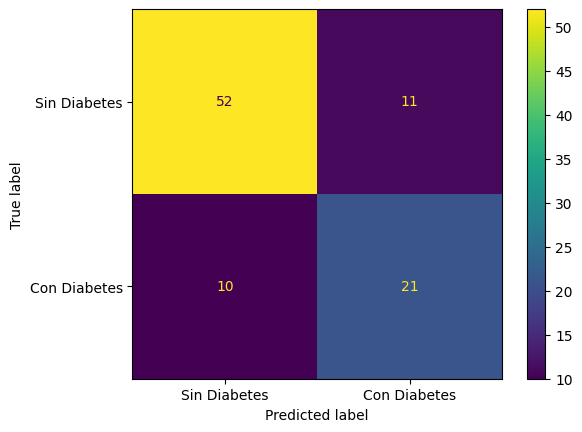

In [118]:
# Matriz de Confusi√≥n - Modelo √Årbol
visualizacion_arbol_desafio = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_arbol_desafio,
    display_labels=['Sin Diabetes', 'Con Diabetes']  # Etiquetas para las clases 0 y 1
)

visualizacion_arbol_desafio.plot();

In [119]:
# Matriz de Confusi√≥n tipo Array - Modelo Forest
y_previsto_forest_desafio = modelo_forest_desafio.predict(X_val_desafio)
matriz_confusion_forest_desafio = confusion_matrix(y_val_desafio,y_previsto_forest_desafio)
print(matriz_confusion_forest_desafio)

[[58  5]
 [23  8]]


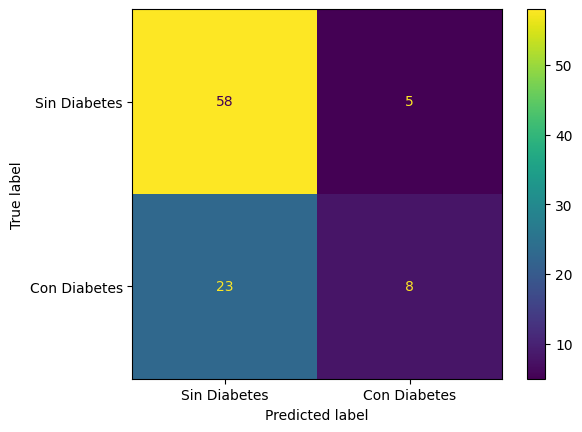

In [120]:
# Matriz de Confusi√≥n - Modelo Forest
visualizacion_forest_desafio = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest_desafio,
    display_labels=['Sin Diabetes', 'Con Diabetes']  # Etiquetas para las clases 0 y 1
)

visualizacion_forest_desafio.plot();

### 2) M√©tricas de evaluaci√≥n

**Estos desaf√≠os dependen del modelo generado en los desaf√≠os de la clase 1.**

**`1 -`** Para una evaluaci√≥n completa de un modelo de clasificaci√≥n, podemos explorar m√©tricas que eval√∫an la tasa de acierto general y tambi√©n para cada clase de la variable objetivo de forma individual. **`Extrae las m√©tricas de precisi√≥n, recall, accuracy y F1-Score de los modelos de clasificaci√≥n generados en el desaf√≠o de la clase 1.`** La biblioteca Scikit-Learn tiene funciones para calcular cada una de las m√©tricas, solo necesitas importar y utilizar como par√°metros los valores reales y previstos por el modelo.

**`2 -`** Adem√°s de m√©tricas num√©ricas, se pueden explorar gr√°ficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. **`Obt√©n la curva ROC y la m√©trica AUC`** de los modelos de clasificaci√≥n generados en el desaf√≠o de la clase 1, comparando las curvas en el mismo gr√°fico. La curva ROC se puede generar usando el m√©todo RocCurveDisplay.from_predictions.

**`3 -`** Adem√°s de la curva ROC, la curva de precisi√≥n x recall se puede usar para evaluar el rendimiento de modelos, siendo m√°s interesante para datos desbalanceados. **`Obt√©n la curva de precisi√≥n x recall y la m√©trica AP`** de los modelos de clasificaci√≥n generados en el desaf√≠o de la clase 1, comparando las curvas en el mismo gr√°fico. La curva de precisi√≥n x recall se puede generar usando el m√©todo PrecisionRecallDisplay.from_predictions.

**`4 -`** Un resumen de las principales m√©tricas de clasificaci√≥n puede ser muy √∫til para resumir la informaci√≥n y generar insights de forma r√°pida. **`Genera los informes de m√©tricas de los modelos de clasificaci√≥n construidos en el desaf√≠o de la clase 1`**. El informe de m√©tricas se puede generar a partir de la funci√≥n classification_report de la biblioteca Scikit-Learn.

#### Extraer M√©tricas: Precisi√≥n, Recall, Accuracy y F1

In [121]:
# Importamos las principales m√©tricas para modelos de clasificaci√≥n
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [122]:
# M√©tricas Modelo √Årbol
print(f'La precisi√≥n del modelo de √°rbol es: {precision_score(y_val_desafio,y_previsto_arbol_desafio)}')
print(f'La sensibilidad (recall) del modelo de √°rbol es: {recall_score(y_val_desafio,y_previsto_arbol_desafio)}')
print(f'La exactitud (accuracy) del modelo de √°rbol es: {accuracy_score(y_val_desafio,y_previsto_arbol_desafio)}')
print(f'El F1-Score del modelo de √°rbol es: {f1_score(y_val_desafio,y_previsto_arbol_desafio)}')

La precisi√≥n del modelo de √°rbol es: 0.65625
La sensibilidad (recall) del modelo de √°rbol es: 0.6774193548387096
La exactitud (accuracy) del modelo de √°rbol es: 0.776595744680851
El F1-Score del modelo de √°rbol es: 0.6666666666666666


In [123]:
# M√©tricas Modelo Forest
print(f'La precisi√≥n del modelo forest es: {precision_score(y_val_desafio,y_previsto_forest_desafio)}')
print(f'La sensibilidad (recall) del modelo forest es: {recall_score(y_val_desafio,y_previsto_forest_desafio)}')
print(f'La exactitud (accuracy) del modelo forest es: {accuracy_score(y_val_desafio,y_previsto_forest_desafio)}')
print(f'El F1-Score del modelo forest es: {f1_score(y_val_desafio,y_previsto_forest_desafio)}')

La precisi√≥n del modelo forest es: 0.6153846153846154
La sensibilidad (recall) del modelo forest es: 0.25806451612903225
La exactitud (accuracy) del modelo forest es: 0.7021276595744681
El F1-Score del modelo forest es: 0.36363636363636365


#### Curva ROC y M√©trica AUC

In [124]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
# Importamos la funci√≥n para calcular el √°rea bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

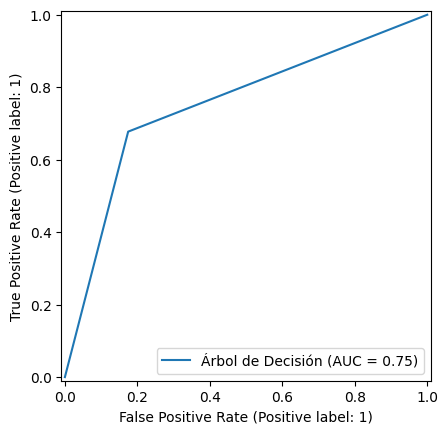

In [125]:
# Curva ROC Modelo √Årbol
RocCurveDisplay.from_predictions(y_val_desafio,y_previsto_arbol_desafio, name='√Årbol de Decisi√≥n');

In [126]:
# El √Årea Bajo la Curva (AUC) - Modelo √Årbol
print(f'El √°rea bajo la curva ROC del modelo de √°rbol es de: {roc_auc_score(y_val_desafio, y_previsto_arbol_desafio)}')

El √°rea bajo la curva ROC del modelo de √°rbol es de: 0.7514080901177674


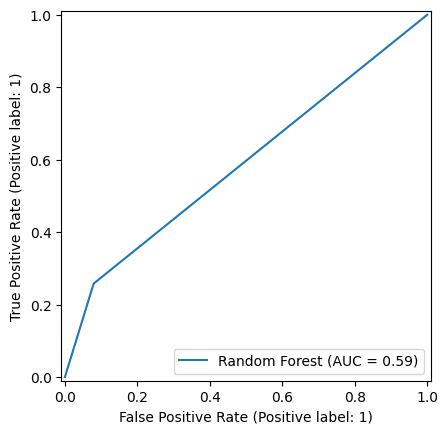

In [127]:
# Curva ROC Modelo Forest
RocCurveDisplay.from_predictions(y_val_desafio,y_previsto_forest_desafio, name='Random Forest');

In [128]:
# El √Årea Bajo la Curva (AUC) - Modelo Forest
print(f'El √°rea bajo la curva ROC del modelo forest es de: {roc_auc_score(y_val_desafio, y_previsto_forest_desafio)}')

El √°rea bajo la curva ROC del modelo forest es de: 0.5893497183819765


#### Curva de Precisi√≥n x Recall y M√©trica AP (Average Precision)

In [129]:
# Importamos la clase que permite graficar la curva Precisi√≥n vs Recall
from sklearn.metrics import PrecisionRecallDisplay

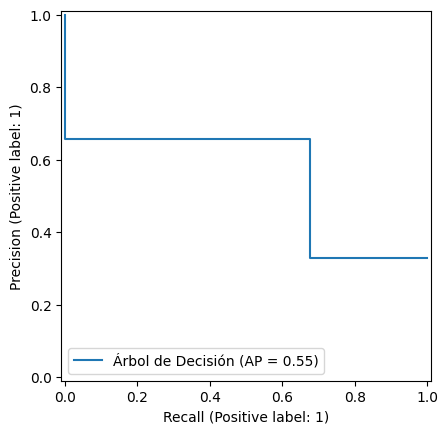

In [130]:
# Curva de Precisi√≥n x Recall - Modelo √Årbol
PrecisionRecallDisplay.from_predictions(y_val_desafio, y_previsto_arbol_desafio, name='√Årbol de Decisi√≥n');

In [131]:
# M√©trica AP - Modelo √Årbol
print(f'El score promedio de precisi√≥n vs recall para el modelo de √°rbol es de: {average_precision_score(y_val_desafio, y_previsto_arbol_desafio)}')

El score promedio de precisi√≥n vs recall para el modelo de √°rbol es de: 0.5509394303363074


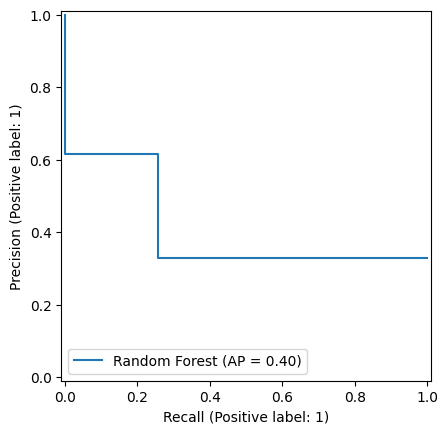

In [132]:
# Curva de Precisi√≥n x Recall - Modelo Forest
PrecisionRecallDisplay.from_predictions(y_val_desafio, y_previsto_forest_desafio, name='Random Forest');

In [133]:
# M√©trica AP - Modelo Forest
print(f'El score promedio de precisi√≥n vs recall para el modelo forest es de: {average_precision_score(y_val_desafio, y_previsto_forest_desafio)}')

El score promedio de precisi√≥n vs recall para el modelo forest es de: 0.4034897840663112


#### Informe de M√©tricas

In [134]:
# Informe de M√©tricas
from sklearn.metrics import classification_report

In [135]:
# Informe de M√©tricas para Modelo de √Årbol
print(f'Informe de M√©tricas para Modelo de √Årbol:\n\n{classification_report(y_val_desafio, y_previsto_arbol_desafio)}')

print('\n*******************************************************\n')

# Informe de M√©tricas para Modelo Forest
print(f'Informe de M√©tricas para Modelo Forest:\n\n{classification_report(y_val_desafio, y_previsto_forest_desafio)}')

Informe de M√©tricas para Modelo de √Årbol:

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94


*******************************************************

Informe de M√©tricas para Modelo Forest:

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        63
           1       0.62      0.26      0.36        31

    accuracy                           0.70        94
   macro avg       0.67      0.59      0.58        94
weighted avg       0.68      0.70      0.66        94

